# InstaBot - Part 2

In [150]:
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from bs4 import BeautifulSoup
from collections import OrderedDict 
import time
from datetime import datetime, timedelta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [151]:
#opening the browser, change the path as per location of chromedriver in your system
driver = webdriver.Chrome()
driver.maximize_window()

In [152]:
#opening instagram
driver.get('https://www.instagram.com/')

In [153]:
#update your username and password here
username = 'SAMPLE_USERNAME'
password = 'SAMPLE_PASSWORD'

In [154]:
#initializing  wait object
wait = WebDriverWait(driver, 10)

In [155]:
def LogIn(username, password):
    try :
        user_name = driver.find_element_by_name('username')
        user_name.send_keys(username)
        #locating password box and sending password
        pwd = driver.find_element_by_name('password')
        pwd.send_keys(password)
        #locating login button 
        button = wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class, "Igw0E")]//button[contains(@class, "sqdOP")]')))
        button.submit()
        #Save Your Login Info? : Not Now
        pop = wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class, "cmbtv")]//button[contains(@class, "sqdOP")]')))
        pop.click()
        #Turn on Notifications :Not Now
        pop1 = wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class, "mt3GC")]//button[contains(@class, "aOOlW")]')))
        pop1.click()
    except TimeoutException :
        print ("Something went wrong! Try Again")

In [156]:
#Login to your Instagram Handle
LogIn(username, password)

In [157]:
##search_open_profile() function is same as part-I. All the functionality is same as before.
def search_open_profile(s):
    try:
        #locatong search box bar and sending text 
        search_box = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'XTCLo')))
        search_box.send_keys(s)
        #locating serched result
        res = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'-qQT3')))
        res.click()           

        time.sleep(5)
        #driver.back()
    
    except TimeoutException :
        print('No Search Found!')
    

### Problem 1 : Analyse the habits of bloggers
Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.    
1.From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers  
2.Now Find the number of posts these handles have done in the previous 3 days.  
3.Depict this information using a suitable graph.  

##### 1.From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [158]:
#First 10 handles from part-1
first_10_handles = ['foodtalkindia','foodzeee','foodie_incarnate','food_lunatic','dilsefoodie','foodofgoa','food',
                    'vibrantshades009','yourfoodlab','foodiesdelhite']

In [159]:
#function for getting top 5 handle which have highest number of followers
def top_5_handles(lst):
    try:
        #dct contains username with number of followers
        dct = {}
        for i in lst :
            #This fuction will search a user and open that profile
            search_open_profile(i)
            time.sleep(2)
            #locating followers of user
            followers = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,'g47SY')))[1]
            #replacing ',' with '' and converted into int
            dct[i] = int(followers.get_attribute('title').replace(',' , ''))
        #top 5 most followed user
        count = 0
        res = OrderedDict()
        for i in sorted(dct, key=dct.get, reverse=True):
            res[i] = dct[i]
            count += 1
            if(count >= 5) : 
                break
                
        return res
    except TimeoutException :
        print ("Something went wrong! Try Again")

In [ ]:
top_handles = top_5_handles(first_10_handles)

In [18]:
print('Top 5 instagram handles which have the highest number of followers :')
for uname in top_handles:
    print(uname,' ---- ',top_handles[uname])

Top 5 instagram handles which have the highest number of followers :
yourfoodlab  ----  1759295
dilsefoodie  ----  814862
foodzeee  ----  789024
foodie_incarnate  ----  648376
foodtalkindia  ----  305962


##### 2.Now Find the number of posts these handles have done in the previous 3 days.

In [19]:
#this function returns number of post posted by user in n days
def count_of_post(day):
    try :
        #locating first post
        post = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'v1Nh3')))
        post.click()
        
        count = 0 
        while True :
            #getting date of the the post
            temp = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_1o9PC')))
            #getting date in string format
            date_string = temp.get_attribute('datetime')
            #converting into date format
            date = datetime.strptime(date_string[0:19], "%Y-%m-%dT%H:%M:%S")
            #taking differnce between today's date and post posted date
            if (datetime.now() - date).days > day :
                break
            else :
                count += 1
            #locating next button
            next_but = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_65Bje')))
            next_but.click()
        #closing the post
        close=driver.find_element_by_xpath("//div[contains(@class, 'Igw0E')]//button[contains(@class, 'wpO6b')]")
        close.click()
        return count
    
    except TimeoutException :
        print ("Something went wrong! Try Again")

In [20]:
total_post_count = {}
for i in top_handles :
    search_open_profile(i)
    time.sleep(2)
    count = count_of_post(3)
    total_post_count[i] = count

In [21]:
print('Number of posts these handles have done in the previous 3 days : -')
for i in total_post_count:
    print(i,total_post_count[i])

Number of posts these handles have done in the previous 3 days : -
yourfoodlab 2
dilsefoodie 7
foodzeee 3
foodie_incarnate 6
foodtalkindia 6


##### 3.Depict this information using a suitable graph.

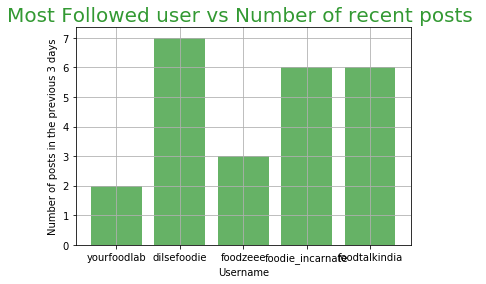

In [22]:
# using total_post_count to get username and number of post
x = total_post_count.keys()
y = total_post_count.values()
plt.bar(x,y,color='g',alpha=0.6)
plt.ylabel("Number of posts in the previous 3 days",size=10)
plt.xlabel("Username",size=10)
plt.title('Most Followed user vs Number of recent posts ',fontsize=20, color='green',alpha=0.8)
plt.grid()
plt.show()

### Problem 2 : List of hashtags
Your friend also needs a list of hashtags that he should use in his posts.  
1.Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.  
2.Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.  
3.Create a csv file with two columns : the word and its frequency  
4.Now, find the hashtags that were most popular among these bloggers  
5.Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.  

In [23]:
def extract_content(lst):
    try :
        hashtags_list = []
        for user in lst:
            #This fuction will search a user and open that profile
            search_open_profile(user)
            time.sleep(2)
            #just for scrolling to getting post
            driver.execute_script('window.scrollTo(0, 3000);')
            time.sleep(2)
            driver.execute_script('window.scrollTo(0, -3000);')
            time.sleep(2)
            #locating the post of the user
            posts = driver.find_elements_by_class_name('v1Nh3')
            for post in posts[:10]:
                post.click()
                time.sleep(2)
                #locating all hashtag used in this post
                hashtags=driver.find_elements_by_class_name("xil3i")
                for hashtag in hashtags:
                    #appending in list
                    hashtags_list.append(hashtag.text)  
                
                #locating close button and clicking on it
                close=driver.find_element_by_xpath("//div[contains(@class, 'Igw0E')]//button[contains(@class, 'wpO6b')]")
                time.sleep(1)
                close.click()
        return hashtags_list
    
    except TimeoutException :
        print ("Something went wrong! Try Again")
        
    

In [24]:
handles = list(total_post_count.keys())
hashtags = extract_content(handles)

In [25]:
print(hashtags)

['#recipe', '#foodporn', '#paratha', '#indianfood', '#streetfoodindia', '#quesadilla', '#quesadillas', '#foodie', '#foodpics', '#mumbaistreetfood', '#streetfood', '#streetfoodindia', '#sanjyotkeer', '#yourfoodlab', '#recipe', '#chaat', '#aloo', '#aloorecipes', '#chaatlover', '#chaatlove', '#streetfood', '#indianstreetfood', '#foodporn', '#recipes', '#inovation', '#atombomb', '#streetphotography', '#sanjyotkeer', '#yourfoodlab', '#recipe', '#chaat', '#aloo', '#aloorecipes', '#chaatlover', '#chaatlove', '#streetfood', '#indianstreetfood', '#foodporn', '#recipes', '#inovation', '#atombomb', '#streetphotography', '#sanjyotkeer', '#yourfoodlab', '#recipe', '#foodie', '#indiancuisine', '#streetfood', '#wrap', '#foodporn', '#roll', '#paneer', '#paneerrecipes', '#paneerlover', '#paneerroll', '#sanjyotkeer', '#yourfoodlab', '#indianfood', '#instadaily', '#recipe', '#foodie', '#indiancuisine', '#streetfood', '#wrap', '#foodporn', '#roll', '#paneer', '#paneerrecipes', '#paneerlover', '#paneerroll

##### 2.Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [26]:
dct = {}
words_list = []
for word in hashtags:
    dct[word] = dct.get(word,0) + 1
    
for i in sorted(dct, key=dct.get, reverse=True):
    words_list.append([i,dct[i]])
    print(i,dct[i])

#foodtalkindia 16
#foodporn 15
#streetfood 13
#foodzeee 12
#recipe 10
#sanjyotkeer 10
#yourfoodlab 10
#foodiesofinstagram 10
#foodtalk 10
#indianfood 9
#streetfoodindia 9
#reelitfeelit 9
#delhi 9
#yummy 9
#foodie 8
#reelkarofeelkaro 8
#foodieincarnate 8
#foodies 8
#dilsefoodie 7
 7
#delicious 7
#foodpics 6
#indianstreetfood 6
#indiancuisine 6
#food 6
#sodelhi 6
#newdelhi 6
#delhigram 6
#delhifoodblogger 6
#delhifoodie 6
#delhifood 6
#mumbai 6
#goodfood 6
#mumbaistreetfood 5
#paneer 5
#reelsinstagram 5
#reels 5
#foodlover 5
#foodgram 5
#foodblogger 5
#indianfoodbloggers 5
#paneerrecipes 4
#instadaily 4
#homemade 4
#foodgasm 4
#foodpornshare 4
#delhistreetfood 4
#indianfoodie 4
#desikhana 4
#indianfoodblogger 4
#foodiesofindia 4
#foodiesofmumbai 4
#corn 3
#HotFind 3
#foodiesofdelhi 3
#foodiesofbengaluru 3
#chaat 2
#aloo 2
#aloorecipes 2
#chaatlover 2
#chaatlove 2
#recipes 2
#inovation 2
#atombomb 2
#streetphotography 2
#wrap 2
#roll 2
#paneerlover 2
#paneerroll 2
#crispy 2
#sweetcorn 2
#

##### 3.Create a csv file with two columns : the word and its frequency

In [27]:
df = pd.DataFrame(words_list,columns=['Words','Frequency'])
#using .to_csv pandas function to convert dataframe to csv
df.to_csv('words_frequency.csv',index=False)
df.head(10)

,Words,Frequency
0,#foodtalkindia,16
1,#foodporn,15
2,#streetfood,13
3,#foodzeee,12
4,#recipe,10
5,#sanjyotkeer,10
6,#yourfoodlab,10
7,#foodiesofinstagram,10
8,#foodtalk,10
9,#indianfood,9


##### 4.Now, find the hashtags that were most popular among these bloggers

In [28]:
print(words_list[0][0])

#foodtalkindia


##### 5.Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

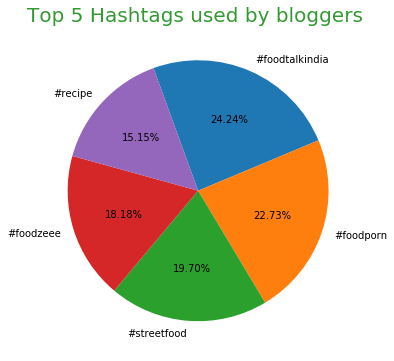

In [29]:
#using answer of problem 2.2
hashtag_name = [words_list[0][0],words_list[1][0],words_list[2][0],words_list[3][0],words_list[4][0]]
count = [words_list[0][1],words_list[1][1],words_list[2][1],words_list[3][1],words_list[4][1]]
plt.figure(figsize=(12,6))
plt.pie(count,labels=hashtag_name,autopct='%0.2f%%',radius=1,counterclock=False,startangle=110)
plt.title('Top 5 Hashtags used by bloggers ',fontsize=20, color='green',alpha=0.8)
plt.show()

### Problem 3 : Followers : Likes ratio
You need to also calculate average followers : likes ratio for the obtained handles.
Followers : Likes ratio is calculated as follows:  
1.Find out the likes of the top 10 posts of the 5 handles obtained earlier.  
2.Calculate the average likes for a handle.  
3.Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.  
4.Create a bar graph to depict the above obtained information.  

##### 1.Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [138]:
#This function returns list of likes of 10 post of a user
def get_likes(user):
    try :
            likes = []
            #This function will search a user and open that profile
            search_open_profile(user)
            time.sleep(2)
            #just for scrolling
            driver.execute_script('window.scrollTo(0, 3000);')
            time.sleep(2)
            driver.execute_script('window.scrollTo(0, -3000);')
            time.sleep(2)
            #locating the post of the user
            posts = driver.find_elements_by_class_name('v1Nh3')
            for post in posts[0:10]:
                post.click()
                time.sleep(2)
                try :
                    #for getting like on video we need to first click on view then only we can like
                    views = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'vcOH2')))
                    views.click()
                    time.sleep(1)
                    
                    #locating like and clicking on it
                    like = driver.find_element_by_xpath("//div[contains(@class, 'HbPOm')]//span[contains(@class, 'vcOH2')]/span")
                    no_of_likes = (like.text).replace(',' , '')
                    likes.append(int(no_of_likes))
                    time.sleep(1)
                    #just clicking one body to get original post back
                    driver.find_element_by_xpath("//div[contains(@class, 'eo2As')]").click()  
                    
                #if the post is image then this part will execute 
                except TimeoutException :
                    
                    like = driver.find_element_by_xpath("//div[contains(@class, 'Nm9Fw')]//a[contains(@class, 'zV_Nj')]/span")
                    no_of_likes = (like.text).replace(',' , '')
                    likes.append(int(no_of_likes))
                    time.sleep(1)
                #locating close button and clicking on it
                close=driver.find_element_by_xpath("//div[contains(@class, 'Igw0E')]//button[contains(@class, 'wpO6b')]")
                time.sleep(1)
                close.click()
                                
            return likes
    
    except TimeoutException :
        print ("Something went wrong! Try Again")
        
    

In [141]:
#dct will store username with list of likes
dct = {}
for user in handles :
    driver.get('https://www.instagram.com/')
    likes = get_likes(user)
    dct[user] = likes
    print('Number of likes of the top 10 posts of',user,':')
    for i in likes :
        print(i,'Likes')
    print()

Number of likes of the top 10 posts of yourfoodlab :
25754 Likes
199452 Likes
30102 Likes
252789 Likes
27963 Likes
29944 Likes
529503 Likes
31777 Likes
244603 Likes
29604 Likes

Number of likes of the top 10 posts of dilsefoodie :
3634 Likes
27498 Likes
32762 Likes
11947 Likes
27770 Likes
227612 Likes
243692 Likes
17921 Likes
34748 Likes
38010 Likes

Number of likes of the top 10 posts of foodzeee :
31699 Likes
18963 Likes
42424 Likes
52050 Likes
339356 Likes
35504 Likes
31153 Likes
28243 Likes
17888 Likes
25232 Likes

Number of likes of the top 10 posts of foodie_incarnate :
195480 Likes
32787 Likes
42471 Likes
606164 Likes
62310 Likes
17606 Likes
529936 Likes
90769 Likes
30580 Likes
563599 Likes

Number of likes of the top 10 posts of foodtalkindia :
238 Likes
870 Likes
178 Likes
901 Likes
8330 Likes
572 Likes
586 Likes
1092 Likes
1136 Likes
5865 Likes



##### 2.Calculate the average likes for a handle.

In [142]:
#This function will return a dictionary of {'username':average like}
def get_avg_likes(d):
    avg_likes = {}
    for key,val in d.items():
            avg = sum(val) // 10
            avg_likes[key] = avg
    return avg_likes

In [143]:
avg_likes = get_avg_likes(dct)

print('Average likes for each handle are :')
for user,likes in avg_likes.items():
    print(user, ':', likes)

Average likes for each handle are :
yourfoodlab : 140149
dilsefoodie : 66559
foodzeee : 62251
foodie_incarnate : 217170
foodtalkindia : 1976


##### 3.Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [144]:
#This function will return dictionary of {'username':avg followers-like ratio}
def getavg_foll_like_ratio(top_handles,avg_like,users):
    foll_like = {}
    for i in range(5) :
        foll_like[users[i]] = top_handles[users[i]]//avg_like[users[i]]
    return foll_like

In [145]:
#here I am using the answer of problem 1.1 which contains a dictionary of {'username':followers} ie top_handles
#extracing username from top_handles
top_handles_names = list(top_handles.keys())
#now calling function getavg_foll_like_ratio(top_handles,avg_like,users) 
avg_fol_like_ratio = getavg_foll_like_ratio(top_handles, avg_likes, top_handles_names)
print('Average followers:like ratio of each handle :')
for user,ratio in avg_fol_like_ratio.items():
    print(user, ':', ratio)

Average followers:like ratio of each handle :
yourfoodlab : 12
dilsefoodie : 12
foodzeee : 12
foodie_incarnate : 2
foodtalkindia : 154


##### 4.Create a bar graph to depict the above obtained information.

In [146]:
#Plotting Bar Graph for average likes of each handle

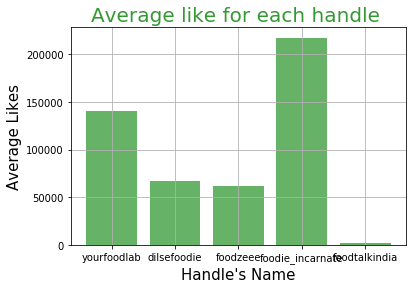

In [147]:
#for this I will use answer of problem 3.2 
username = list(avg_likes.keys())
avg_like = list(avg_likes.values())

plt.bar(username,avg_like,color='g',alpha=0.6)
plt.ylabel("Average Likes",size=15)
plt.xlabel("Handle's Name",size=15)
plt.title('Average like for each handle ',fontsize=20, color='green',alpha=0.8)
plt.grid()
plt.show()

In [148]:
# Plotting Bar Graph for average followers:like ratio of each handle

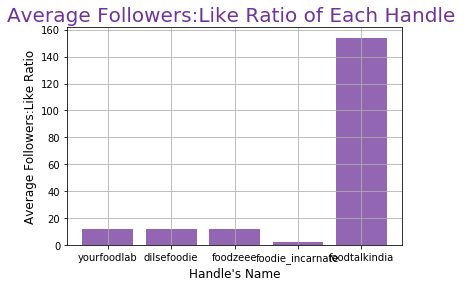

In [149]:
#For this I will use answer of problem 3.3
username = list(avg_fol_like_ratio.keys())
avg_like = list(avg_fol_like_ratio.values())

plt.bar(username,avg_like,color='Indigo',alpha=0.6)
plt.ylabel("Average Followers:Like Ratio",size=12)
plt.xlabel("Handle's Name",size=12)
plt.title('Average Followers:Like Ratio of Each Handle ',fontsize=20, color='Indigo',alpha=0.8)
plt.grid()
plt.show()